In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\naama\Desktop\Chen\projects\form\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023") #The full data set is too large to load
raw_review_All_Beauty = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", split="full", trust_remote_code=True)
raw_products_All_Beauty = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)

All_Beauty_r = pd.DataFrame(raw_review_All_Beauty.to_pandas())
All_Beauty_p = pd.DataFrame(raw_products_All_Beauty.to_pandas())

# Customer reviews dicriptive analysis

In [38]:
raw_review_All_Beauty[0]

{'rating': 5.0,
 'title': 'Such a lovely scent but not overpowering.',
 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",
 'images': [],
 'asin': 'B00YQ6X8EO',
 'parent_asin': 'B00YQ6X8EO',
 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ',
 'timestamp': 1588687728923,
 'helpful_vote': 0,
 'verified_purchase': True}

In [26]:
All_Beauty_r = All_Beauty_r.drop(['images'], axis=1)
All_Beauty_r['review'] = All_Beauty_r['title'] + ' ' + All_Beauty_r['text']
All_Beauty_r = All_Beauty_r.drop(['title', 'text'], axis=1)
All_Beauty_r['rating'] = All_Beauty_r['rating'].astype('category')
All_Beauty_r['timestamp'] = pd.to_datetime(All_Beauty_r['timestamp'], unit='ms')
All_Beauty_r['year'] = All_Beauty_r['timestamp'].dt.year
All_Beauty_r['month'] = All_Beauty_r['timestamp'].dt.month
All_Beauty_r['date'] = All_Beauty_r['timestamp'].dt.date
All_Beauty_r['day_of_week'] = All_Beauty_r['timestamp'].dt.day_name()
All_Beauty_r['hour'] = All_Beauty_r['timestamp'].dt.hour

All_Beauty_r = All_Beauty.drop(['timestamp'], axis=1)

All_Beauty_r

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,year,month,date,day_of_week,hour
0,5.0,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,Such a lovely scent but not overpowering. This...,2020,5,2020-05-05,Tuesday,14
1,4.0,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,Works great but smells a little weird. This pr...,2020,5,2020-05-04,Monday,18
2,5.0,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,"Yes! Smells good, feels great!",2020,5,2020-05-16,Saturday,21
3,1.0,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,Synthetic feeling Felt synthetic,2022,1,2022-01-28,Friday,18
4,5.0,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,A+ Love it,2020,12,2020-12-30,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701523,4.0,B006YUIWKA,B006YUIWKA,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,2016-11-04 02:37:01.000,0,True,Four Stars Conditioner is great shampoo not a...,2016,11,2016-11-04,Friday,2
701524,1.0,B006YUIWKA,B006YUIWKA,AFV7YZFOJF564EZGET5LG45K4QEA,2016-12-05 03:32:10.000,0,False,Pretty Did not work! Used the whole bottle and...,2016,12,2016-12-05,Monday,3
701525,5.0,B06ZZV9MZT,B06ZZV9MZT,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,2020-05-27 02:52:54.067,0,True,Great sunless tanner Product as expected. Ship...,2020,5,2020-05-27,Wednesday,2
701526,5.0,B000HB6VLE,B000HB6VLE,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,2007-07-18 22:36:49.000,4,False,The Crown on top is a Ring!!! Not only is it a...,2007,7,2007-07-18,Wednesday,22


In [29]:
print('Number of reviews:', All_Beauty_r.shape[0])
print('Number of unique products:', All_Beauty_r['asin'].nunique())
print('Number of unique reviewers:', All_Beauty_r['user_id'].nunique())

Number of reviews: 701528
Number of unique products: 115709
Number of unique reviewers: 631986


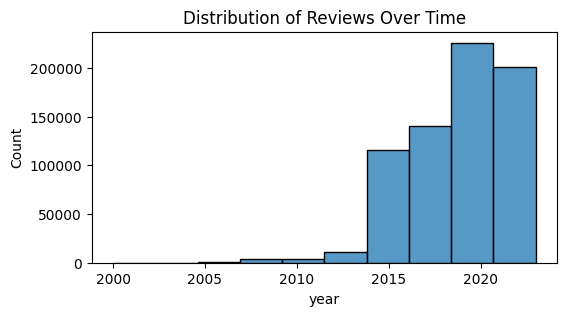

In [31]:
# plot distribution of reviews over time
plt.figure(figsize=(6, 3))
sns.histplot(All_Beauty_r['year'], kde=False, bins=10)
plt.title('Distribution of Reviews Over Time')
plt.show()

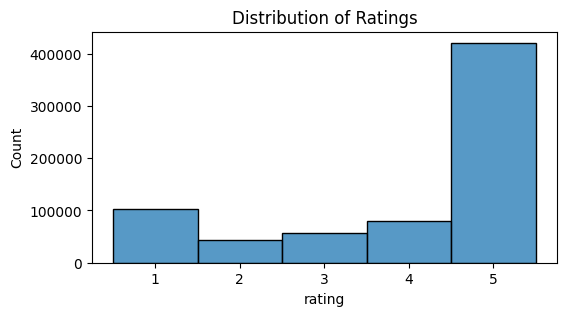

In [30]:
plt.figure(figsize=(6, 3))
sns.histplot(All_Beauty_r['rating'], kde=False)
plt.title('Distribution of Ratings')
plt.show()

In [60]:
print('Median number of ratings per reviewer:', All_Beauty_r.groupby('user_id').size().median())
print('Median number of ratings per product:', All_Beauty_r.groupby('asin').size().median())

Median number of ratings per reviewer: 1.0
Median number of ratings per product: 2.0


In [53]:
print('All reviews of the user with the most reviews:')
All_Beauty_r[All_Beauty_r['user_id'] == All_Beauty_r['user_id'].value_counts().idxmax()]

All reviews of the user with the most reviews:


,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,year,month,date,day_of_week,hour
1738,5.0,B09L563Q84,B09L563Q84,AG73BVBKUOH22USSFJA5ZWL7AKXA,2022-01-04 02:17:13.460,0,False,scrunchies get used in my house all the time w...,2022,1,2022-01-04,Tuesday,2
1739,5.0,B09KT4RJG6,B09KT4RJG6,AG73BVBKUOH22USSFJA5ZWL7AKXA,2021-12-23 00:16:37.848,0,False,smells good I just put this on and it was crea...,2021,12,2021-12-23,Thursday,0
1740,3.0,B098KHM22M,B098KHM22M,AG73BVBKUOH22USSFJA5ZWL7AKXA,2021-11-07 21:17:51.302,0,False,the oils are fine they are not fragrance free ...,2021,11,2021-11-07,Sunday,21
1741,5.0,B07FQ93GYV,B07FQ93GYV,AG73BVBKUOH22USSFJA5ZWL7AKXA,2021-10-14 02:14:38.777,0,False,You need this set after you have a laser treat...,2021,10,2021-10-14,Thursday,2
1742,5.0,B082TPQY2R,B082TPQY2R,AG73BVBKUOH22USSFJA5ZWL7AKXA,2021-09-26 22:47:48.157,1,False,great stuff for dry and cracked skin This help...,2021,9,2021-09-26,Sunday,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,5.0,B06XD3SXQ8,B09J5TZ7HL,AG73BVBKUOH22USSFJA5ZWL7AKXA,2018-09-15 01:42:40.642,0,False,Quality makes a big difference The needles in ...,2018,9,2018-09-15,Saturday,1
1899,5.0,B00WTWQMQI,B00WTWQMQI,AG73BVBKUOH22USSFJA5ZWL7AKXA,2015-05-30 21:46:35.000,0,False,PediSoft Electric Pedicure Callus Remover This...,2015,5,2015-05-30,Saturday,21
1900,5.0,B00OPEASFO,B00OPEASFO,AG73BVBKUOH22USSFJA5ZWL7AKXA,2015-04-19 00:26:45.000,0,False,Swiss Botany Serum Swiss Botany makes wonderfu...,2015,4,2015-04-19,Sunday,0
1901,5.0,B00KCTER3U,B00KCTER3U,AG73BVBKUOH22USSFJA5ZWL7AKXA,2015-04-19 00:14:43.000,0,False,Instanatural anti-aging facial moisturizer Thi...,2015,4,2015-04-19,Sunday,0


In [ ]:
# the user with the most reviews:
user_id = All_Beauty_r['user_id'].value_counts().idxmax()

In [62]:
# about user AG73BVBKUOH22USSFJA5ZWL7AKXA
user_id = All_Beauty_r['user_id'].value_counts().idxmax()
print('The user with the most reviews:')
print('Number of reviews:', All_Beauty_r[All_Beauty_r['user_id'] == user_id].shape[0])
print('Number of unique products:', All_Beauty_r[All_Beauty_r['user_id'] == user_id]['asin'].nunique())
print('Activiti period:', All_Beauty_r[All_Beauty_r['user_id'] == user_id]['date'].min(), 'to', All_Beauty_r[All_Beauty_r['user_id'] == user_id]['date'].max())


The user with the most reviews:
Number of reviews: 165
Number of unique products: 165
Activiti period: 2015-03-08 to 2022-01-04


In [66]:
#Product with the most reviews
priduct_id = All_Beauty_r['asin'].value_counts().idxmax()
print('The product with the most reviews:')
print('Number of reviews:', All_Beauty_r[All_Beauty_r['asin'] == priduct_id].shape[0])
print('Number of unique reviewers:', All_Beauty_r[All_Beauty_r['asin'] == priduct_id]['user_id'].nunique())
print('Activiti period:', All_Beauty_r[All_Beauty_r['asin'] == priduct_id]['date'].min(), 'to', All_Beauty_r[All_Beauty_r['asin'] == priduct_id]['date'].max())
print('Avarage reviews per year:', All_Beauty_r[All_Beauty_r['asin'] == priduct_id].shape[0] / All_Beauty_r[All_Beauty_r['asin'] == priduct_id]['year'].nunique())

The product with the most reviews:
Number of reviews: 1962
Number of unique reviewers: 1952
Activiti period: 2012-08-14 to 2023-08-04
Avarage reviews per year: 163.5


# Product review decsriptive analysis

In [67]:
All_Beauty_p.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Howard Products,[],"{""Package Dimensions"": ""7.1 x 5.5 x 3 inches; ...",B01CUPMQZE,None,None,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Yes To,[],"{""Item Form"": ""Powder"", ""Skin Type"": ""Acne Pro...",B076WQZGPM,None,None,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],None,"{'hi_res': [None, None], 'large': ['https://m....","{'title': [], 'url': [], 'user_id': []}",Levine Health Products,[],"{""Manufacturer"": ""Levine Health Products""}",B000B658RI,None,None,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Cherioll,[],"{""Brand"": ""Cherioll"", ""Item Form"": ""Powder"", ""...",B088FKY3VD,None,None,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Precision,[],"{""UPC"": ""644287689178""}",B07NGFDN6G,None,None,None


In [85]:
All_Beauty_p[All_Beauty_p['price'] != 'None'][['title', 'parent_asin', 'price', 'description']]

,title,parent_asin,price,description
5,Lurrose 100Pcs Full Cover Fake Toenails Artifi...,B07G9GWFSM,6.99,"[Description, The false toenails are durable w..."
8,Gold extatic Musk EDT 90ml,B01ERJEGS6,86.95,[Edt spray 3 oz design house: balmain]
12,Brand New Headrang Face line Contour V-line Ma...,B06XJZ7955,79.5,[]
16,"BioMiracle StarDust Pixie Bubble Mask, Clarify...",B08X7JHQG5,5.99,[This foaming pixie sheet mask is infused with...
22,VIROCHEMISTRY Pheromones For Women (Elixir) - ...,B07X1TK3VS,29.8,[The Most Amazingly Effective and Fantastic Sm...
...,...,...,...,...
112555,C.O. Bigelow 2 pack Mentha Lip Tint Pink Mint ...,B07R27Q67K,39.99,[]
112569,DND Gel & Matching Polish Set #526 - Sea By Ni...,B01C3K0SHO,9.95,[]
112580,The Apothecary Collection by Dr Botanicals Cof...,B07C5CVXC7,4.99,[]
112584,ELISHACOY Or.day Mild Sun Cream SPF50 PA++++ 5...,B07RD3YSNR,23.5,[]


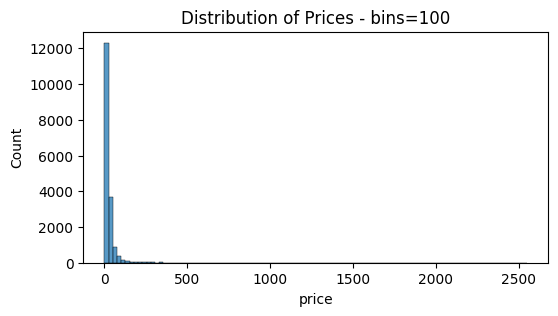

In [99]:
# Distirbution of prices
All_Beauty_p['price'] = All_Beauty_p[All_Beauty_p['price'] != 'None']['price'].astype(float)
plt.figure(figsize=(6, 3))
sns.histplot(All_Beauty_p['price'], kde=False, bins=100)
plt.title('Distribution of Prices - bins=100')
plt.show()